# Project: Recommendation engines (MovieLens)

For this assignment we will build and apply item-based and model-based collaborative filtering recommenders for movies. 

<font color=red>This project should be completed in colab only</font> 

Student name: <font color="blue">Genghua Chen</font>

E-mail: <font color="blue">gchen846@mt.feitian.edu</font>

Date: <font color="blue">4/18/2021</font>

# 0. The MovieLens-1M dataset

We will use the [MovieLens DataSet](https://grouplens.org/datasets/movielens/1m/). This dataset was released in 2003 and most of the movies on it are from the 1980s and 1990s. 

<font color=red>Note</font> You are not allowed to use any data other than from above link. MovieLens DataSet cleaned/reformated by other sources should not be used.

Remember the data is contained in three files: `ratings.dat`, `users.dat`, and `movies.dat`.

Carefully read the **README.txt** file for descriptions on the data.
    


# 0.1. Load the input files

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from math import *
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import linear_kernel
import os
import seaborn as sns

**Download the file, unzip and figure out the file paths**

### <font color=red>To do: </font> 
Complete cell below to for specified tasks

In [ ]:
# Download data and unzip with linux command lines, remember you need to prefix commands with "!"
# You want to click on folder icon on the left menu of colab to see the file paths.
# Use linux command to list the file to confirm your path
# You also want to take a look at header of the file to verify the format
# Check for linux command cheatsheet on canvas files/ folder, looking in 
# "5 – FILE AND DIRECTORY COMMANDS" if you forget certain commands.

!wget --no-check-certificate ml-1m.zip https://files.grouplens.org/datasets/movielens/ml-1m.zip
# !ls
!unzip -o -j ml-1m.zip




--2021-04-19 00:01:53--  http://ml-1m.zip/
Resolving ml-1m.zip (ml-1m.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘ml-1m.zip’
--2021-04-19 00:01:53--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  12.4MB/s    in 0.5s    

2021-04-19 00:01:54 (12.4 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

FINISHED --2021-04-19 00:01:54--
Total wall clock time: 0.8s
Downloaded: 1 files, 5.6M in 0.5s (12.4 MB/s)
Archive:  ml-1m.zip
  inflating: movies.dat              
  inflating: ratings.dat             
  inflating: README                  
  inflating: users.dat               


In [ ]:
!pwd

/content


In [ ]:
!head -11 movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller
11::American President, The (1995)::Comedy|Drama|Romance


In [ ]:
!head ratings.dat

1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291
1::1197::3::978302268
1::1287::5::978302039
1::2804::5::978300719
1::594::4::978302268
1::919::4::978301368


In [ ]:
!head users.dat

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455
6::F::50::9::55117
7::M::35::1::06810
8::M::25::12::11413
9::M::25::17::61614
10::F::35::1::95370


### <font color=red>To do: </font> 
Complete cell below to for specified tasks

In [ ]:
FILENAME_RATINGS = "ratings.dat"
FILENAME_USERS =  "users.dat"
FILENAME_MOVIES = "movies.dat"
print(FILENAME_RATINGS)
print(os.path.exists(FILENAME_RATINGS))

ratings.dat
True


### <font color=red>To do: </font> 
Complete cell below to for specified tasks

In [ ]:
ratings_raw = pd.read_csv(FILENAME_RATINGS, sep = '::', names=['user_id', 'movie_id', 'rating', 'timestamp'])
# Please assign follow column names to pandas: 
# ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_raw

users = pd.read_csv(FILENAME_USERS, sep = '::', names = ['user_id', 'gender', 'age', 'occupation', 'zipcode'])
# Please assign follow column names to pandas: 
#['user_id', 'gender', 'age', 'occupation', 'zipcode']


_ = users.set_index('user_id') # Answer questions about this line later

movies = pd.read_csv(FILENAME_MOVIES, 
                    encoding='latin-1',
                     sep = '::', names = ['movie_id', 'title', 'genres'])

# Please assign follow column names to pandas: 
# ['movie_id', 'title', 'genres'])

# _ = movies.set_index('movie_id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as 

**Compare before and after running**
```python
users.set_index('user_id') 
```
What does it do ?

In [ ]:
users

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
user = users.set_index('user_id') 

**<font color=red>Your answer: </font>**
> users.set_index('user_id') is to set the user_id as index in users table instead of the row number.



### <font color=red>To do: </font> 
add code below to verify ratings_raw has 1000209 rows; users has 6040 rows, movies has 3883 rows.

In [ ]:
print(ratings_raw.shape)
print(users.shape)
print(movies.shape)

(1000209, 4)
(6040, 5)
(3883, 3)


# 0.2. Merge the data into a single dataframe

In [ ]:
user

,gender,age,occupation,zipcode
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [ ]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings_raw


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
ratings_1 = pd.merge(ratings_raw, movies)
ratings_1
ratings = pd.merge(ratings_1, users)
ratings

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [ ]:
# txt = "hello my name is Peter I am 26 years old"
# x = txt.split(" ")
# print(x)

# for i in range(len(txt)):
  # x.str.contains(i, regex=False)]



In [ ]:
def find_movies(x):


  x = x.split(" ")
  z = ratings
  for i in x:
    # a = ratings[ratings['title'].str.contains(i, regex=False)]
    z = z[z['title'].str.contains(i, regex=False)]
  return z

x = 'Life My'
y = "Pumpkinhead"
find_movies(x)
# print(find_movies(y))


,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
1803,33,1300,5,978557952,My Life as a Dog (Mitt liv som hund) (1985),Drama,M,45,3,55421
3255,53,269,4,977986238,My Crazy Life (Mi vida loca) (1993),Drama,M,25,0,96931
3561,53,1300,5,977983335,My Life as a Dog (Mitt liv som hund) (1985),Drama,M,25,0,96931
4352,59,1300,4,977934457,My Life as a Dog (Mitt liv som hund) (1985),Drama,F,50,1,55413
4552,62,269,4,977901961,My Crazy Life (Mi vida loca) (1993),Drama,F,35,3,98105
...,...,...,...,...,...,...,...,...,...,...
985714,5391,1300,3,960324222,My Life as a Dog (Mitt liv som hund) (1985),Drama,M,25,7,10016
990597,2032,1734,1,974674892,My Life in Pink (Ma vie en rose) (1997),Comedy|Drama,M,50,14,44614
990879,2829,793,2,972591273,My Life and Times With Antonin Artaud (En comp...,Drama,M,45,20,10013
997159,2209,1734,4,974603211,My Life in Pink (Ma vie en rose) (1997),Comedy|Drama,M,35,7,10011


# 1. Exploratory Data Analysis

First we continue exploring this dataset to learn more about it.

## 1.1. Unique registers

Count the number of unique users and unique movies in the `ratings` variable. Use [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)



In [ ]:
print('The number of unique users: ',ratings['user_id'].nunique())
print('The number of unique movies: ',ratings['movie_id'].nunique())


The number of unique users:  6040
The number of unique movies:  3706


## 1.2. Age differences in ratings

Now let's look at whether people of different age rate movies differently. In this dataset the `age` column is actually a range:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

Create a [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) in which in the x axis you have the age buckets and in the y axis the distribution of ratings. 



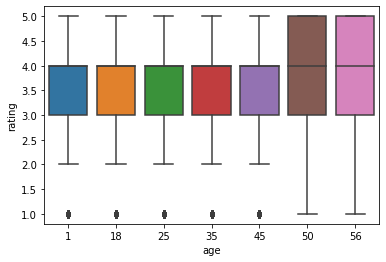

In [ ]:
sns.boxplot(x = 'age', y = 'rating', data = ratings)

From the boxplot we know that under 18 to 49 have almost the same distribution, 50 to above 56 have same distribution.

# 2. Item-based Collaborative Filtering

The two main types of interactions-based recommender system, also known as *collaborative filtering* algorithms are:

1. **User-based Collaborative Filtering**: To recommend items for user A, we first look at other users B1, B2, ..., Bk with a similar behavior to A, and aggregate their preferences. For instance, if all Bi like a movie that A has not watched, it would be a good candidate to be recommended. 


2. **Item-based Collaborative Filtering**: To recommend items for user A, we first look at all the items I1, I2, ..., Ik that the user A has consumed, and find items that elicit similar ratings from other users. For instnce, an item that is rated positively by the same users that rate positively the Ii items, and negatively by the same users that rate negatively the Ii items, would be a good candidate to be recommended.

In both cases, a similarity matrix needs to be built. For user-based, the **user-similarity matrix** will consist of some **distance metrics** that measure the similarity between any two pairs of users. For item-based, the **matrix** will measure the similarity between any two pairs of items.

As we already know, there are several metrics strategy for measure the "similarity" of two items. Some of the most used metrics are Jaccard, Cosine and Pearson. Meanwhile, Jaccard similarity is based on the number of users which have rated item A and B divided by the number of users who have rated either A or B (very useful for those use cases where there is not a numeric rating but just a boolean value like a product being bought), in Pearson and Cosine similarities we measure the similarity between two vectors.

For the purpose of this assignment, we will use **Pearson Similarity** and we will implement a **Item-based Collaborative filtering**.



## 2.1. Data pre-processing

Firstly, create a new dataset "rated_movies" that [merges](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) `ratings_raw` and `movies` on the **movie_id** variable. [Drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) from this the columns we do not need: *genres* and *timestamp*. Print the first 5 rows of this new dataframe.

You can reuse some code from previous part when you creating "ratings".

In [ ]:
rated_movies = pd.merge(ratings_raw, movies)
rated_movies
rated_movies.drop(columns = ['genres', 'timestamp'])
rated_movies.head(5)

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Now, using the rated_movies dataframe, create a new dataframe named `ratings_summary` containing the following columns:

* movie_id
* title
* ratings_mean (average rating, using Baysian average, ref. Guest-Lecture-part-1)
* ratings_count (number of people who have rated this movie)

You can use the following operations:

* Initialize `ratings_summary` to be only the movie_id and title of all movies in `rated_movies`
   * To group dataframe `df` by column `a` and keep only one unique row per value of `a`, use: `df.groupby('a').first()`
* Compute two series: `ratings_mean` and `ratings_count`:
   * To obtain a series with the average of column `a` for each distinct value of column `b` in dataframe `df`, use: `df.groupby('b')['a'].mean()`; use ` ratings.groupby('b')['a'].agg(myFunc)` to apply your own function myFunc to do your version of mean or other aggregation operation
   * To obtain a series with the count of column `a` for each distinct value of column `b` in dataframe `df`, use: `df.groupby(b)['a'].count()`
* Add these series to the `ratings_summary`
   * To add a series `s` with column name `a` to dataframe `df`, use: `df['a'] = s`
    


In [ ]:
movie_stats = ratings.groupby('movie_id')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()
movie_stats

,count,mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


In [ ]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = ((C * m) + ratings.sum()) / (C + ratings.count())
    return bayesian_avg

In [ ]:
ratings_mean = ratings.groupby('movie_id')['rating'].agg(bayesian_avg).reset_index()
ratings_mean.head()

,movie_id,rating
0,1,4.042433
1,2,3.211635
2,3,3.096905
3,4,3.041998
4,5,3.117469


In [ ]:
ratings_mean.columns = ['movie_id', 'bayesian_avg']
movie_stat = movie_stats.merge(ratings_mean, on='movie_id')
ratings_summary = movie_stat.merge(rated_movies, on = 'movie_id')
# ratings_mean
# movie_stat
ratings_summary = ratings_summary[['movie_id', 'title', 'bayesian_avg', 'count']]
ratings_summary.columns = ['movie_id', 'title', 'rating_mean', 'rating_count']
ratings_summary

,movie_id,title,rating_mean,rating_count
0,1,Toy Story (1995),4.042433,2077
1,1,Toy Story (1995),4.042433,2077
2,1,Toy Story (1995),4.042433,2077
3,1,Toy Story (1995),4.042433,2077
4,1,Toy Story (1995),4.042433,2077
...,...,...,...,...
1000204,3952,"Contender, The (2000)",3.558566,388
1000205,3952,"Contender, The (2000)",3.558566,388
1000206,3952,"Contender, The (2000)",3.558566,388
1000207,3952,"Contender, The (2000)",3.558566,388


In [ ]:
ratings_summary = ratings_summary.drop_duplicates(subset=['title'])
ratings_summary = ratings_summary.sort_values(by=['rating_count'], inplace=False, ascending=False)
ratings_summary.head(10)

,movie_id,title,rating_mean,rating_count
766585,2858,American Beauty (1999),4.238673,3428
67447,260,Star Wars: Episode IV - A New Hope (1977),4.353151,2991
296220,1196,Star Wars: Episode V - The Empire Strikes Back...,4.205708,2990
312853,1210,Star Wars: Episode VI - Return of the Jedi (1983),3.955782,2883
129014,480,Jurassic Park (1993),3.715688,2672
554929,2028,Saving Private Ryan (1998),4.235926,2653
159810,589,Terminator 2: Judgment Day (1991),3.982728,2649
692115,2571,"Matrix, The (1999)",4.214199,2590
359307,1270,Back to the Future (1985),3.919235,2583
165343,593,"Silence of the Lambs, The (1991)",4.246353,2578


The most rated movie is American Beauty(1999). The second, third and fourth rated movies are Star war. And rating for those movies have higher rating mean as well.

## 2.2. Compute user-movie matrix

Before calculating the **similarity matrix**, we create a table where columns are movies and rows are users, and each movie-user cell contains the score of that user for that movie.

We will use the [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function of Pandas. If you have a dataframe D containing:

```
U V W
1 a 3.0
1 b 2.0
2 a 1.0
2 c 4.0
```

Calling `D.pivot_table(index='U', columns='V', values='W')` will create the following:

```
V  a   b   c
U
1 3.0 2.0 NaN
2 1.0 NaN 4.0
```



In [ ]:
user_movie = rated_movies.pivot_table(index='user_id', columns='movie_id', values='rating')
user_movie

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,4.0,NaN,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,4.0,3.0,NaN,4.0,3.0,4.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row is a user and NaN is the movie not rate by user. Most of the user won't watch and rate all the movie, so that is why there are so many NaN.

# 2.3. Explore some correlations in the user-movie matrix

Now let us explore whether correlations in this matrix make sense.

Locate the movie_id for *[The Godfather (1972)](https://en.wikipedia.org/wiki/The_Godfather)*, *[The Godfather Part II (1974)](https://en.wikipedia.org/wiki/The_Godfather_Part_II)*, *[Saving Private Ryan (1998)](https://en.wikipedia.org/wiki/Saving_Private_Ryan)* and *[Dirty Dancing (1987)](https://en.wikipedia.org/wiki/Dirty_Dancing)* using the `find_movies` function you defined above.

Now, obtain the ratings for each of these movies: `user_movie[movie_id].dropna()`. You will obtain a series for each movie.

Now, consolidate these four series into a single dataframe: `ratings4 = pd.concat([s1, s2, s3, s4], axis=1)`

Drop from `ratings4` all rows containing a *NaN*. This will keep only users that have rated the 4 movies.

Display the resulting table.



In [ ]:
god = 'The Godfather'
sav = 'Saving Private'
dir = 'Dirty Dancing'
god_m = find_movies(god)
sav_m = find_movies(sav)
dir_m = find_movies(dir)
# ratings1 = pd.concat([god_m, sav_m], ignore_index=True)
# ratings = pd.concat([ratings1, dir_m], ignore_index=True)
# print(ratings1)

# god_m
# sav_m
# dir_m

In [ ]:
s1 = user_movie[858].dropna()
s2 = user_movie[1221].dropna()
s3 = user_movie[2028].dropna()
s4 = user_movie[1088].dropna()
ratings4 = pd.concat([s1, s2, s3, s4], axis=1)
ratings4.dropna()

,858,1221,2028,1088
user_id,,,,
53,5.0,5.0,5.0,4.0
62,5.0,5.0,4.0,3.0
148,4.0,4.0,5.0,4.0
151,4.0,3.0,5.0,5.0
169,4.0,4.0,4.0,1.0
...,...,...,...,...
5886,5.0,4.0,4.0,3.0
5888,5.0,5.0,4.0,3.0
5916,5.0,4.0,4.0,4.0


First for all, the name of 'The godfather' are incorrect in the original dataset, such as "Godfather: Part II, The ", "Godfather, The", my old find_moives function does not work at all, so I added a for loop to it.

Only 217 users has rated these four movies, some of the users like The godfather also like the godfather II.

In [ ]:
ratings4.corr(method ='pearson')

,858,1221,2028,1088
858,1.000000,0.714074,0.208010,-0.194391
1221,0.714074,1.000000,0.138471,-0.070313
2028,0.208010,0.138471,1.000000,0.188493
1088,-0.194391,-0.070313,0.188493,1.000000


The correlations just verified what we just said, The godfather and The godfather II has largest correlation.

Now let us take one of these movies *[Dirty Dancing (1987)](https://en.wikipedia.org/wiki/Dirty_Dancing)*, a musical romance. Select the column corresponding to this movie in `user_movies` and compute its correlation with all other columns in `user_movies`. This can be done with  [corrwith](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html). You might receive a runtime warning on degrees of freedom and/or division by zero, which you can safely ignore.



In [ ]:
a = user_movie[1088].dropna()
# print(type(a))
# user_movie['movie_id'].dropna()
# z[z['title'].str.contains(i, regex=False)]
similar_to_dirt = user_movie.corrwith(a)
similar_to_dirt = similar_to_dirt.dropna()
similar_to_dirt

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie_id
1       0.193828
2       0.217617
3       0.188667
4       0.180094
5       0.310525
          ...   
3948    0.118325
3949   -0.020589
3950    0.171421
3951    0.353553
3952    0.236221
Length: 3336, dtype: float64

Next, create a dataframe `corr_with_dirt` by using `similar_to_dirt` and `ratings_summary`. This dataframe should have the following columns:

* corr - the correlation between each movie and the selected movie
* title
* ratings_mean
* ratings_count

To create a dataframe `df` from a series `s`, use: `df = pd.DataFrame(s, columns=['colname'])`. 

Keep only rows in which *ratings_count* > 500, i.e., popular movies. To filter a dataframe `df` and keep only rows having column `c` larger than `x`, use `df[df[c] > x]`.

Display the top 10 rows with the largest correlation. To select the largest `n` rows from dataframe `df` according to column `c`, use `df.sort_values(c, ascending=False).head(n)`. 



In [ ]:
corr =  pd.DataFrame(similar_to_dirt, columns=['corr'])
corr

corr_rated = pd.merge(corr, ratings_summary, on = 'movie_id')
corr_rated
corr_with_dirt = corr_rated[(corr_rated['rating_count']> 500)]
corr_with_dirt.head(10)
corr_with_dirt.shape

(617, 5)

If we remove the limit of ratings_count > 500,there would be more rows, some of the movies has higher correlation even the ratings count is low

# 2.4. Implement the item-based recommendations

Now that we believe that this type of correlation sort of makes sense, let us implement the item-based recommender. We need all correlations between columns in `user_movie`. To compute all correlations between columns in a dataframe, use [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

This process may take a few minutes. Print the first 5 rows of the resulting matrix when done.



In [ ]:
item_similarity = user_movie.corr()
item_similarity

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.187467,0.160649,0.348759,0.156957,0.051097,0.149536,0.151248,-0.039358,0.143598,0.178132,-0.137543,0.367319,0.131390,0.242681,0.043230,0.243105,0.036027,0.014299,0.107843,0.125379,0.200846,-0.035507,0.122251,0.006754,0.312122,0.088439,0.192769,0.175563,-0.055855,0.114885,0.138821,NaN,0.353371,-1.693727e-01,0.196241,-0.090909,-0.030092,0.234685,0.000000,...,0.517821,-0.043214,0.304050,0.342581,0.050829,0.045087,0.017830,0.026593,0.159030,0.043495,0.076393,-0.214599,2.467757e-01,-0.044437,0.283359,0.068927,0.242841,0.087971,0.265283,0.186175,0.315244,0.381126,-0.062348,0.051363,0.045852,0.290957,0.100080,0.196116,0.098017,0.164399,-0.099845,0.174078,0.146344,0.135146,0.431743,0.139323,0.189518,0.146536,0.324325,0.157996
2,0.187467,1.000000,0.149349,0.057874,0.384293,0.075067,0.251093,0.312949,0.407857,0.254558,0.348027,0.266940,0.434016,0.039576,0.633272,0.075084,0.225088,0.171153,0.176681,0.421625,0.140579,0.305513,0.265891,0.431679,0.018979,0.063040,0.335794,0.040424,0.057296,0.387376,0.221613,0.109306,NaN,0.083197,2.913428e-01,0.036258,NaN,0.225083,0.142564,0.525657,...,0.384900,-0.131590,0.148766,0.283564,0.127532,0.043131,-0.111332,0.150027,0.408248,0.564412,-0.039482,0.944911,9.006314e-02,0.309674,0.272472,0.288534,0.033638,0.133439,0.341565,0.254567,0.461935,0.968330,0.000000,-0.061719,0.310886,0.242821,0.158777,-0.406181,-0.045835,0.196116,0.009798,-1.000000,0.276240,0.133538,0.042524,0.216196,0.082241,-0.154672,-0.353553,0.073111
3,0.160649,0.149349,1.000000,0.261800,0.399532,0.156934,0.220211,0.394405,0.151163,0.269250,0.215101,0.259303,0.421073,-0.100151,0.310961,0.225666,-0.065997,0.243604,0.162162,0.286984,-0.083856,0.217130,0.105638,0.299255,0.021117,0.302629,-0.094039,0.202899,0.029796,0.158777,0.277037,0.167152,NaN,0.097648,1.658370e-01,0.014134,NaN,0.351708,0.046425,-0.927173,...,0.489932,-0.772460,0.444692,0.299230,0.000226,0.083940,0.270588,0.102517,0.727860,0.800400,0.391023,0.440086,5.125645e-01,0.064912,0.001063,0.328815,0.311281,0.379961,-0.152894,0.053550,-0.845154,-0.485071,0.500000,0.194683,0.382512,0.418113,0.148936,0.500000,0.447214,0.615587,-0.134059,0.239046,-0.361158,0.205521,-0.024042,0.314249,0.026743,0.445399,NaN,0.110024
4,0.348759,0.057874,0.261800,1.000000,0.401954,-0.012096,0.097271,0.074080,-0.681895,0.010868,0.106668,0.048349,0.683130,0.343123,0.170634,0.170884,0.327879,-0.094959,-0.119494,0.241514,0.128556,0.086612,-0.088736,0.410575,0.220847,0.356631,0.448026,0.268635,0.114897,-0.577350,0.301625,0.162919,NaN,0.256196,1.478133e-17,0.073257,NaN,-0.503367,0.252183,-0.870388,...,0.866025,0.272307,0.510113,0.581170,0.387014,0.072032,0.000000,NaN,0.636364,NaN,0.653544,0.500000,-6.221114e-01,0.565916,0.365367,0.225749,-0.870388,0.620674,NaN,0.421831,NaN,NaN,1.000000,0.578947,-0.310087,NaN,NaN,NaN,NaN,NaN,0.589662,NaN,NaN,0.158114,-0.500000,0.209258,-0.434783,0.500000,0.000000,0.154463
5,0.156957,0.384293,0.399532,0.401954,1.000000,0.075755,0.276160,0.589313,0.538139,0.241397,0.355588,0.121475,0.722885,0.239612,0.339753,0.080868,0.080862,-0.019885,0.236696,0.082608,-0.013681,0.298616,0.330664,0.447699,0.098042,0.460171,0.586984,-0.321093,0.693579,-0.153897,0.311235,0.138823,NaN,0.060792,4.308202e-01,0.095617,1.000000,0.366900,0.102426,-0.188982,...,0.288960,-0.561249,-0.046374,0.396936,-0.280753,-0.159179,-0.164348,0.000000,0.554051,0.896388,0.029881,0.866025,1.764706e-01,0.309464,0.343219,0.220947,0.138845,0.573313,0.500000,0.404197,NaN,NaN,NaN,0.151990,0.280828,0.333333,0.333333,0.555556,0.333333,0.400000,-0.533114,0.188982,NaN,0.522037,0.960769,0.416291,-0.133077,0.650000,N

Similarities between movies that do not have many ratings in common are unreliable. Fortunately, the `corr` method includes a parameter `min_periods` that establishes a minimum number of elements in common that two columns must have to compute the correlation.

Re-generate item_similarity setting min_periods to 100.

This process will also take a few minutes. Print the first 5 rows of the resulting matrix when done.



In [ ]:
item_similarity_min_ratings = user_movie.corr(min_periods = 100)
item_similarity_min_ratings

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.187467,0.160649,0.348759,0.156957,0.051097,0.149536,NaN,NaN,0.143598,0.178132,-0.137543,NaN,NaN,0.242681,0.043230,0.243105,0.036027,0.014299,0.107843,0.125379,0.200846,NaN,0.122251,0.006754,NaN,NaN,NaN,0.175563,NaN,NaN,0.138821,NaN,0.353371,NaN,0.196241,NaN,NaN,0.234685,NaN,...,NaN,NaN,NaN,0.342581,0.050829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283359,0.068927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139323,0.189518,NaN,NaN,0.157996
2,0.187467,1.000000,0.149349,NaN,0.384293,0.075067,0.251093,NaN,NaN,0.254558,0.348027,NaN,NaN,NaN,NaN,0.075084,0.225088,NaN,0.176681,NaN,0.140579,0.305513,NaN,0.431679,0.018979,NaN,NaN,NaN,0.057296,NaN,NaN,0.109306,NaN,0.083197,NaN,0.036258,NaN,NaN,0.142564,NaN,...,NaN,NaN,NaN,0.283564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216196,NaN,NaN,NaN,NaN
3,0.160649,0.149349,1.000000,NaN,0.399532,0.156934,0.220211,NaN,NaN,0.269250,0.215101,NaN,NaN,NaN,NaN,0.225666,-0.065997,NaN,0.162162,NaN,-0.083856,0.217130,NaN,0.299255,0.021117,NaN,NaN,NaN,NaN,NaN,NaN,0.167152,NaN,0.097648,NaN,0.014134,NaN,NaN,0.046425,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.314249,NaN,NaN,NaN,NaN
4,0.348759,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.106668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256196,NaN,NaN,NaN,NaN,0.252183,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.156957,0.384293,0.399532,NaN,1.000000,NaN,0.276160,NaN,NaN,0.241397,0.355588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236696,NaN,-0.013681,NaN,NaN,NaN,0.098042,NaN,NaN,NaN,NaN,NaN,NaN,0.138823,NaN,0.060792,NaN,NaN,NaN,NaN,0.102426,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.139323,0.216196,0.314249,NaN,NaN,0.096261,0.053806,NaN,NaN,0.194463,0.075444,NaN,NaN,NaN,NaN,0.162432,0.172616,NaN,0.025738,NaN,0.201124,0.207478,NaN,0.122220,0.081170,NaN,NaN,NaN,NaN,NaN,NaN,0.115852,NaN,0.147237,NaN,0.201680,NaN,NaN,0.153533,NaN,...,NaN,NaN,NaN,0.182934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.078538,NaN,NaN,0.110107
3949,0.189518,NaN,NaN,NaN,NaN,0.048698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128607,NaN,NaN,NaN,0.236679,NaN,NaN,NaN,NaN,NaN,NaN,0.165016,NaN,0.084106,NaN,0.307820,NaN,NaN,0.022870,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078538,1.000000,NaN,NaN,0.110383
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will need to test our function so let us select a couple of interesting users.

Our first user, `user_id_rom` will be someone who has given the following 3 films a rating of 4.0 or higher:

* movie_id=587: *Ghost (1990)*
* movie_id=1088: *Dirty Dancing (1987)*
* movie_id=3257: *The Bodyguard (1992)* 	

Our second user, `user_id_sci` will be someone who has given the following 3 films a rating of 4.0 or higher:

* movie_id=1214: *Alien (1979)*
* movie_id=3527: *Predator (1987)*
* movie_id=260: *Star Wars (1977)*

To filter a dataframe by multiple conditions you can use, e.g., `df[(a > 1) & (b > 2)]`. 

**Important**: these particular users have watched lots of movies, so we cannot tell for sure they have only these interests.

In [ ]:
user_movie
r1 = user_movie[587].dropna()
r2 = user_movie[1088].dropna()
r3 = user_movie[3257].dropna()
r_f = pd.concat([r1, r2, r3], axis=1)
r_f.dropna()
# print(r_f.shape[0])
user_id_rom = r_f[(r_f[587]>3) & (r_f[1088]>3)& (r_f[3257]>3)]
user_id_rom = user_id_rom.index[1]

In [ ]:
c1= user_movie[1214].dropna()
c2= user_movie[3527].dropna()
c3= user_movie[260].dropna()
c_f = pd.concat([c1, c2, c3], axis=1)
user_id_sci = c_f[(c_f[1214]>3) & (c_f[3527]>3)& (c_f[260]>3)]
user_id_sci

,1214,3527,260
user_id,,,
17,5.0,4.0,5.0
29,4.0,5.0,5.0
33,4.0,5.0,5.0
36,5.0,5.0,5.0
42,5.0,4.0,5.0
...,...,...,...
5997,5.0,5.0,5.0
6010,4.0,4.0,5.0
6018,5.0,4.0,4.0


We will need some auxiliary functions that are provided below. You can leave as-is.



In [ ]:
# Gets a list of watched movies for a user_id
def get_watched_movies(user_id, user_movie):
    return list(user_movie.loc[user_id].dropna().index)
    
# Gets the title of a movie by movie_id
def get_title(movie_id, movies):
    return movies[movies['movie_id'] == movie_id].title.iloc[0]

# Gets the rating a user_id has given to a movie_id
def get_rating(user_id, movie_id, user_movie):
    return user_movie[movie_id][user_id]

# Print watched movies
def print_watched_movies(user_id, user_movie, movies):
    for movie_id in get_watched_movies(user_id, user_movie):
        print("%d %.1f %s " %
          (movie_id, get_rating(user_id, movie_id, user_movie), get_title(movie_id, movies)))

# Test functions
print_watched_movies(user_id_rom, user_movie, movies)

7 4.0 Sabrina (1995) 
10 4.0 GoldenEye (1995) 
17 3.0 Sense and Sensibility (1995) 
31 4.0 Dangerous Minds (1995) 
39 4.0 Clueless (1995) 
46 4.0 How to Make an American Quilt (1995) 
48 4.0 Pocahontas (1995) 
74 4.0 Bed of Roses (1996) 
79 3.0 Juror, The (1996) 
110 4.0 Braveheart (1995) 
140 4.0 Up Close and Personal (1996) 
145 4.0 Bad Boys (1995) 
153 3.0 Batman Forever (1995) 
186 4.0 Nine Months (1995) 
193 1.0 Showgirls (1995) 
195 4.0 Something to Talk About (1995) 
207 4.0 Walk in the Clouds, A (1995) 
218 5.0 Boys on the Side (1995) 
222 4.0 Circle of Friends (1995) 
231 1.0 Dumb & Dumber (1994) 
237 4.0 Forget Paris (1995) 
248 2.0 Houseguest (1994) 
252 4.0 I.Q. (1994) 
253 2.0 Interview with the Vampire (1994) 
266 4.0 Legends of the Fall (1994) 
277 4.0 Miracle on 34th Street (1994) 
305 1.0 Ready to Wear (Pret-A-Porter) (1994) 
317 4.0 Santa Clause, The (1994) 
339 4.0 While You Were Sleeping (1995) 
342 2.0 Muriel's Wedding (1994) 
350 4.0 Client, The (1994) 
351 2.0 Co

For every user, we will consider that the importance of a new movie (a movie s/he has not rated) will be equal to the sum of the similarities between that new movie and all the movies the user has already rated.

Indeed, to further improve this, we will compute a weighted sum, in which the weight will be the rating given to the movie.

For instance, suppose a user has rated movies as follows:

```
movie_id rating
1        2.0
2        3.0
3        NaN
4        NaN
```

And that movie similarities are as follows (values with a "." do not matter in this example):

```
movie_id   1   2   3   4
1         ...............
2         ...............
3         0.1 0.2 NaN ...
4         0.9 0.8 ... NaN
```

The importance of movie 3 to this user will be:

```
2.0 * 0.1 + 3.0 * 0.2 = 0.8
```

While the importance of movie 4 to this user will be:

```
2.0 * 0.9 + 3.0 + 0.8 = 5.6
```

As we can see, we are favoring movies that are highly similar to many movies that the user has rated high.




Create a function `get_movies_relevance` that returns a dataframe with columns `movie_id` and `relevance`. You can use the following template:





In [ ]:
def get_movies_relevance(user_id, user_movie, item_similarity_matrix):
 
    # Create an empty series
    movies_relevance = pd.Series()
 
    # Iterate through the movies the user has watched
    for watched_movie in get_watched_movies(user_id, user_movie):

 
        # Obtain the rating given
        rating_given = get_rating(user_id, watched_movie, user_movie)
 
        # Obtain the vector containing the similarities of watched_movie
        # with all other movies in item_similarity_matrix
        similarities = item_similarity_matrix[watched_movie]
 
        # Multiply this vector by the given rating
        weighted_similarities = rating_given * similarities
 
        # Append these terms to movies_relevance
        movies_relevance = movies_relevance.append(weighted_similarities)
 
    # Compute the sum for each movie
    movies_relevance = movies_relevance.groupby(movies_relevance.index).sum()
 
    # Convert to a dataframe
    movies_relevance_df = pd.DataFrame(movies_relevance, columns=['relevance'])
    movies_relevance_df['movie_id'] = movies_relevance_df.index
 
    return movies_relevance_df
 

Apply `get_movies_relevance` to the two users we have selected, `user_id_rom` and `user_id_sci`.

The result will contain only `movie_id` and `relevance`, you will have to merge with the `movies` dataframe on the `movie_id` attribute.

Sort the results by descending relevance and print the top 10 for each case.

Verify your result is correct: among the most relevant for `user_id_rom` you should see *[Sister Act (1992)](https://en.wikipedia.org/wiki/Sister_Act)*; and among the most relevant for `user_id_sci` you should see *[Lethal Weapon (1987)](https://en.wikipedia.org/wiki/Lethal_Weapon)*.




In [ ]:
df = pd.DataFrame({
     'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
     'col2': [2, 1, 9, 8, 7, 4],
     'col3': [0, 1, 9, 4, 2, 3],
     'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df
l = [2, 1]
df[~df['col2'].isin(l)]


,col1,col2,col3,col4
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [ ]:
get_m = get_movies_relevance(user_id_rom, user_movie, item_similarity_min_ratings)
get_m
# 3706s
get_m.sort_values(by='relevance', ascending=False)
get_10 = pd.merge(get_m, ratings_summary)
get_10.sort_values(by='relevance', ascending=False).head(10)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,relevance,movie_id,title,rating_mean,rating_count
573,222.639974,587,Ghost (1990),3.446574,1124
583,208.180836,597,Pretty Woman (1990),3.558918,1046
486,207.253860,500,Mrs. Doubtfire (1993),3.375917,838
3033,206.000854,3257,"Bodyguard, The (1992)",2.973740,626
1029,203.170980,1101,Top Gun (1986),3.591828,1010
737,203.052083,780,Independence Day (ID4) (1996),3.473763,1730
3351,202.078195,3591,Mr. Mom (1983),3.356920,628
525,201.632061,539,Sleepless in Seattle (1993),3.648524,986
699,200.850033,733,"Rock, The (1996)",3.641954,1340
702,197.239409,736,Twister (1996),3.186591,1110


In [ ]:
user_id_sci = user_id_sci.index[3]
get_s = get_movies_relevance(user_id_sci, user_movie, item_similarity_min_ratings)
# get_s
# 3706s
get_s.sort_values(by='relevance', ascending=False)
get_11 = pd.merge(get_s, ratings_summary)
get_11.sort_values(by='relevance', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,relevance,movie_id,title,rating_mean,rating_count
1821,300.164209,2001,Lethal Weapon 2 (1989),3.480506,1011
3351,296.514597,3591,Mr. Mom (1983),3.356920,628
1820,293.105248,2000,Lethal Weapon (1987),3.794709,1627
2592,287.162255,2797,Big (1988),3.761249,1491
2277,283.270206,2470,Crocodile Dundee (1986),3.383686,912
2214,280.071458,2407,Cocoon (1985),3.474551,1006
159,279.914052,165,Die Hard: With a Vengeance (1995),3.481761,825
2438,277.869674,2640,Superman (1978),3.482928,1222
780,276.092853,832,Ransom (1996),3.401102,564
1831,274.754414,2011,Back to the Future Part II (1989),3.323887,1158


From the first table we notice that most of top 10 relevance are like romance type movies, so the user 268 tends to watch romance movies.

From the second user we notice that most of top 10 relevance are like action or spy types movies, so this user tends to watch action movies.

Finally, you only need to remove the movies the user has watched. To do so:

* Obtain the dataframe of relevant movies with `get_movies_relevance`
* Set this dataframe index to 'movie_id'
* Obtain the list of movie_ids of watched movies with `get_watched_movies`
* Drop from the relevant movies dataframe the watched movies



In [ ]:
get_s
all_m = get_s.set_index('movie_id')
watched = get_watched_movies(user_id_sci, user_movie)
all_m
type(watched)
all_m

,relevance
movie_id,
1,216.813093
2,212.357538
3,129.885410
4,32.282412
5,135.033647
...,...
3948,169.342596
3949,69.425365
3950,0.000000


In [ ]:
rom_r = get_m[~get_m['movie_id'].isin(watched)]
rom_r.sort_values(by='relevance', ascending=False).head(10)

,relevance,movie_id
3257,206.000854,3257
539,201.632061,539
736,197.239409,736
3107,196.915259,3107
832,194.147811,832
2268,192.439195,2268
2002,192.098765,2002
2011,189.989501,2011
1918,188.845044,1918
3247,188.497319,3247


In [ ]:
sci_r = get_s[~get_s['movie_id'].isin(watched)]
sci_r.sort_values(by='relevance', ascending=False).head(10)

,relevance,movie_id
2470,283.270206,2470
832,276.092853,832
2011,274.754414,2011
2268,268.858224,2268
3274,265.296189,3274
1377,260.869822,1377
2302,258.150027,2302
367,257.422716,367
2054,254.526337,2054
3107,252.070682,3107


Yes, I think they are relevant. After compared, all the movies recommendated to first user still like romance. Same as second user.

In [ ]:
rom_rm = pd.merge(rom_r, ratings_summary, on = 'movie_id')
rom_rm.sort_values(by='relevance', ascending=False).head(10)

,relevance,movie_id,title,rating_mean,rating_count
2726,206.000854,3257,"Bodyguard, The (1992)",2.973740,626
475,201.632061,539,Sleepless in Seattle (1993),3.648524,986
633,197.239409,736,Twister (1996),3.186591,1110
2596,196.915259,3107,Backdraft (1991),3.392904,869
708,194.147811,832,Ransom (1996),3.401102,564
1869,192.439195,2268,"Few Good Men, A (1992)",3.790805,1061
1637,192.098765,2002,Lethal Weapon 3 (1992),3.250468,802
1646,189.989501,2011,Back to the Future Part II (1989),3.323887,1158
1561,188.845044,1918,Lethal Weapon 4 (1998),3.168789,669
2719,188.497319,3247,Sister Act (1992),3.188563,666


In [ ]:
sci_rm = pd.merge(sci_r, ratings_summary, on = 'movie_id')
sci_rm.sort_values(by='relevance', ascending=False).head(10)

,relevance,movie_id,title,rating_mean,rating_count
2045,283.270206,2470,Crocodile Dundee (1986),3.383686,912
708,276.092853,832,Ransom (1996),3.401102,564
1646,274.754414,2011,Back to the Future Part II (1989),3.323887,1158
1869,268.858224,2268,"Few Good Men, A (1992)",3.790805,1061
2742,265.296189,3274,Single White Female (1992),3.157474,438
1144,260.869822,1377,Batman Returns (1992),3.031113,1031
1896,258.150027,2302,My Cousin Vinny (1992),3.675921,1086
321,257.422716,367,"Mask, The (1994)",3.271570,1179
1684,254.526337,2054,"Honey, I Shrunk the Kids (1989)",2.995798,1045
2596,252.070682,3107,Backdraft (1991),3.392904,869


In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 6.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617579 sha256=29a6b8bc53da47175326ba9e4b345d47c68816225806c59d4fd7234a88646422
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
ratings

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [ ]:
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise import accuracy
from collections import defaultdict

df = ratings
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['user_id', 'movie_id', 'rating']], reader)
# data.split(2)
trainset, testset = train_test_split(data, test_size=.10)

In [ ]:
sim_options = {'name': 'cosine',
               'user_based': True  # compute similarities between users
               }
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9786


0.9785900180492744

In [ ]:
def get_top_n(predictions, n=10, user_ids_list=None):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
        user_ids_list(list): optional list of user_ids
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # Initialize an empty list with a dict
    top_n = defaultdict(list)

    # First map the predictions to each user
    for user_id, item_id, true_rating, estimated_rating, details in predictions:
      if not user_ids_list:
        top_n[user_id].append((item_id, estimated_rating))
      else:
        if user_id in user_ids_list:
          top_n[user_id].append((item_id, estimated_rating))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for user_id, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_id] = user_ratings[:n]

    return top_n

In [ ]:
print(user_id_rom)
print(user_id_sci)

268
36


In [ ]:
print("Test set size:", len(testset))
print(testset[0:3])

Test set size: 100021
[(5260, 1211, 5.0), (3892, 994, 4.0), (5607, 441, 3.0)]


In [ ]:
user_ids_list = [user_id_rom, user_id_sci]
top_n = get_top_n(predictions, user_ids_list=user_ids_list, n=10)
print(top_n)
print("user_id_rom: recommendations with ratings:", top_n[user_id_rom])
print("user_id_sci: recommendations with ratings:", top_n[user_id_sci])

defaultdict(<class 'list'>, {268: [(1197, 4.323981686901759), (587, 4.223209002668284), (2795, 4.078129265493913), (1271, 4.075357161782368), (2161, 3.9746594823337533), (1784, 3.950054265595216), (1672, 3.9030897575867267), (2423, 3.902083166459443), (1968, 3.824555528767151), (2496, 3.800101904212695)], 36: [(1172, 4.624616775769099), (858, 4.499704739169685), (3035, 4.499562504575179), (1266, 4.475367888106333), (912, 4.4501459812548205), (3114, 4.425299583118613), (1249, 4.400175577301797), (3147, 4.39856431574781), (1147, 4.375069263194509), (1408, 4.275123100046107)]})
user_id_rom: recommendations with ratings: [(1197, 4.323981686901759), (587, 4.223209002668284), (2795, 4.078129265493913), (1271, 4.075357161782368), (2161, 3.9746594823337533), (1784, 3.950054265595216), (1672, 3.9030897575867267), (2423, 3.902083166459443), (1968, 3.824555528767151), (2496, 3.800101904212695)]
user_id_sci: recommendations with ratings: [(1172, 4.624616775769099), (858, 4.499704739169685), (3035,